In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
def WriteAnswer(num):
    with open('answer.txt', 'w') as f:
        f.write(str(num))

In [3]:
data = load_digits()
X = data.data
y = data.target

In [4]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 1

In [28]:
clf = DecisionTreeClassifier(random_state=1)
cv_scores_1 = cross_val_score(clf, X, y, n_jobs=-1, cv=10, scoring='accuracy')
print('Accuracy на кросс-валидации для 1 дерева: {0}'.format(cv_scores_1.mean()))
WriteAnswer(cv_scores_1.mean())

Accuracy на кросс-валидации для 1 дерева: 0.8308624439503834


## 2

In [45]:
n_trees = 100
bagclf = BaggingClassifier(n_estimators=n_trees, random_state=1)
cv_scores_2 = cross_val_score(bagclf, X, y, n_jobs=-1, cv=10, scoring='accuracy')
print('Accuracy на кросс-валидации для {0} деревьев: {1}\nВыбираем из всех признаков'. \
      format(n_trees, cv_scores_2.mean()))
WriteAnswer(cv_scores_2.mean())

Accuracy на кросс-валидации для 100 деревьев: 0.9271102572603436
Выбираем из всех признаков


## 3 

In [46]:
n_trees = 100
n_features = X.shape[1]
bagclf = BaggingClassifier(n_estimators=n_trees, random_state=1,max_features=int(np.sqrt(n_features)) )
cv_scores_3 = cross_val_score(bagclf, X, y, n_jobs=-1, cv=10, scoring='accuracy')
print('Accuracy на кросс-валидации для {0} деревьев: {1}\nВыбираем и случ подмн-ва признаков для всего дерева'. \
      format(n_trees, cv_scores_3.mean()))
WriteAnswer(cv_scores_3.mean())

Accuracy на кросс-валидации для 100 деревьев: 0.933810128907554
Выбираем и случ подмн-ва признаков для всего дерева


## 4

In [47]:
#именно так устроен RandomForest !
n_trees = 100
n_features = X.shape[1]
clf_tree = DecisionTreeClassifier(random_state=1, max_features='sqrt')
bagclf = BaggingClassifier(base_estimator=clf_tree, n_estimators=n_trees, random_state=1)
                           
cv_scores_3 = cross_val_score(bagclf, X, y, n_jobs=-1, cv=10, scoring='accuracy')
print('Accuracy на кросс-валидации для {0} деревьев: {1}\nВыбираем и случ подмн-ва признаков для каждой вершины'. \
      format(n_trees, cv_scores_3.mean()))
WriteAnswer(cv_scores_3.mean())

Accuracy на кросс-валидации для 100 деревьев: 0.9500349636021452
Выбираем и случ подмн-ва признаков для каждой вершины


## 5
ответ: 2 3 4 7

In [48]:
n_trees = 100
clf_rf = RandomForestClassifier(n_estimators=n_trees, random_state=1)
cv_scores_3 = cross_val_score(bagclf, X, y, n_jobs=-1, cv=10, scoring='accuracy')
print('Accuracy на кросс-валидации для {0} деревьев: {1}\nСлучайный лес из sklearn в чистом виде'. \
      format(n_trees, cv_scores_3.mean()))

Accuracy на кросс-валидации для 100 деревьев: 0.9500349636021452
Случайный лес из sklearn в чистом виде


### 5(1,2,3)

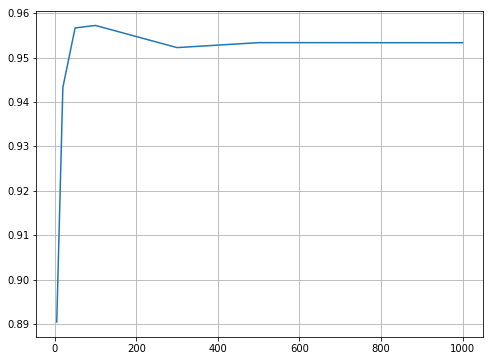

In [58]:
trees = [5, 20, 50, 100, 300, 500, 1000]
scores = []
for n in trees:
    clf_rf = RandomForestClassifier(n_estimators=n, random_state=1)
    cv_scores = cross_val_score(clf_rf, X, y, n_jobs=-1, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())
plt.figure(figsize=(8,6))
plt.plot(trees, scores)
plt.grid(True)
plt.show()

### 5(4,5)

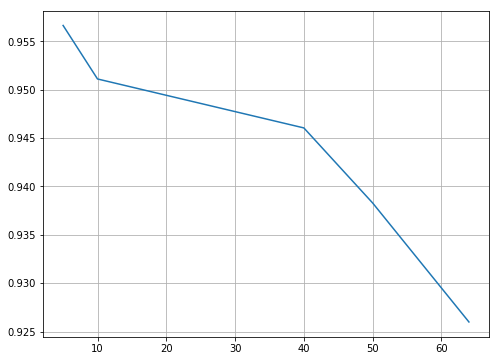

In [57]:
features = [5, 10, 40, 50, X.shape[1]]
scores = []
for n in features:
    clf_rf = RandomForestClassifier(n_estimators=100, max_features=n, random_state=1)
    cv_scores = cross_val_score(clf_rf, X, y, n_jobs=-1, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())
plt.figure(figsize=(8,6))
plt.plot(features, scores)
plt.grid(True)
plt.show()

### 5(6,7)

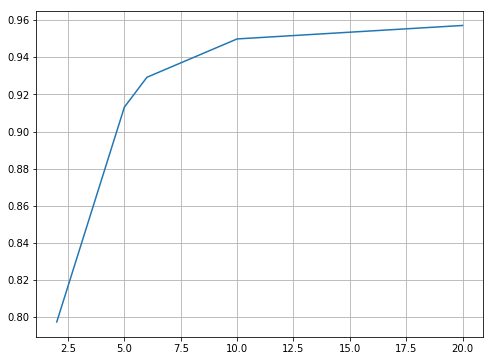

Если max_depth=None, то score: 0.9572130012266203


In [66]:
depths = [2, 5, 6, 10, 20, None]
scores = []
for n in depths:
    clf_rf = RandomForestClassifier(n_estimators=100, max_depth=n, random_state=1)
    cv_scores = cross_val_score(clf_rf, X, y, n_jobs=-1, cv=10, scoring='accuracy')
    scores.append(cv_scores.mean())
plt.figure(figsize=(8,6))
plt.plot(depths[:-1], scores[:-1])
plt.grid(True)
plt.show()
print('Если max_depth=None, то score: {0}'.format(scores[-1]))